In [1]:
import tensorflow as tf
from tensorflow import keras
import datetime
import os
import random
import pandas as pd
import numpy as np
import pickle

/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/a80099707/anaconda3/lib/python3.6/site-packages/tensorflow/pyth

In [2]:
from keras import metrics

from tensorflow.keras.layers import Dense, Concatenate, Add, Multiply
from tensorflow.keras import Input, Model

Using TensorFlow backend.


In [89]:
raw = pd.read_csv('./data/20210421_trainXs_y1_y2.csv', header=None)

In [90]:
raw.groupby(by=51).count()

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
51,,,,,,,,,,,,,,,,,,,,,
1.0,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041,...,4041,4041,4041,4041,4041,4041,4041,4041,4041,4041
2.0,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560,...,1560,1560,1560,1560,1560,1560,1560,1560,1560,1560
3.0,72,72,72,72,72,72,72,72,72,72,...,72,72,72,72,72,72,72,72,72,72
4.0,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175,...,2175,2175,2175,2175,2175,2175,2175,2175,2175,2175
5.0,146,146,146,146,146,146,146,146,146,146,...,146,146,146,146,146,146,146,146,146,146
6.0,34,34,34,34,34,34,34,34,34,34,...,34,34,34,34,34,34,34,34,34,34
7.0,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204,...,5204,5204,5204,5204,5204,5204,5204,5204,5204,5204
8.0,84,84,84,84,84,84,84,84,84,84,...,84,84,84,84,84,84,84,84,84,84
9.0,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436,...,4436,4436,4436,4436,4436,4436,4436,4436,4436,4436


In [91]:
# Feature 개수
FTR_SIZE = 25

In [92]:
X1 = raw.iloc[:, :FTR_SIZE]
X2 = raw.iloc[:, FTR_SIZE:-2]
Y = raw.iloc[:, -2]
Z = raw.iloc[:, -1]

X1.shape, X2.shape, Y.shape, Z.shape

((100000, 25), (100000, 25), (100000,), (100000,))

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test = train_test_split(X1, X2, Y, Z, random_state=66, test_size=0.4)
X1_val, X1_test, X2_val, X2_test, y_val, y_test, z_val, z_test = train_test_split(X1_test, X2_test, y_test, z_test, random_state=66, test_size=0.4)



In [95]:
for item in [X1_train, X1_test, X2_train, X2_test, y_train, y_test, z_train, z_test]:
    print(item.shape)

(60000, 25)
(16000, 25)
(60000, 25)
(16000, 25)
(60000,)
(16000,)
(60000,)
(16000,)


In [96]:
z_train, z_val, z_test = z_train.astype(int), z_val.astype(int), z_test.astype(int)
z_train, z_val, z_test = z_train - 1, z_val - 1, z_test - 1

In [97]:
input_avg = Input(shape=(FTR_SIZE,), name='input_cardsvcs_avg')
input_max = Input(shape=(FTR_SIZE,), name='input_cardsvcs_max')

input_out1 = Dense(32, activation='relu', name='hid_avg')(input_avg)
input_out2 = Dense(32, activation='relu', name='hid_max')(input_max)

concat1 = Concatenate(axis=1)([input_out1, input_out2])
hidden3 = Dense(64, activation='relu', name='hid_concat1')(concat1)
hidden_out = Dense(32, activation='relu', name='hid_concat2')(hidden3)

output1 = Dense(1, name='cont_out')(hidden_out)  # 연회비
output2 = Dense(FTR_SIZE-1, activation='softmax', name='cat_out')(hidden_out)  # 서비스 개수

In [98]:
model = Model(inputs=[input_avg, input_max], outputs=[output1, output2])

model.compile(loss={'cont_out': 'mean_absolute_error', 
                    'cat_out': 'sparse_categorical_crossentropy'}, # softmax_cross_entropy_with_logits_v2
              optimizer='sgd',
              metrics={#'cont_out': metrics.mae,
                  'cat_out': 'sparse_categorical_accuracy'})

In [99]:
hist = model.fit([X1_train,X2_train], {'cont_out': y_train, 'cat_out': z_train},
                    validation_data=([X1_val, X2_val], {'cont_out': y_val, 'cat_out': z_val}),
                    epochs=60, batch_size=20)

Train on 60000 samples, validate on 24000 samples
Epoch 1/60
60000/60000 [==============================] - 9s 150us/step - loss: 1.9858 - cont_out_loss: 0.1123 - cat_out_loss: 1.8735 - cat_out_sparse_categorical_accuracy: 0.4366 - val_loss: 1.4436 - val_cont_out_loss: 0.1315 - val_cat_out_loss: 1.3121 - val_cat_out_sparse_categorical_accuracy: 0.5889
Epoch 2/60
60000/60000 [==============================] - 8s 127us/step - loss: 1.2303 - cont_out_loss: 0.1220 - cat_out_loss: 1.1083 - cat_out_sparse_categorical_accuracy: 0.6332 - val_loss: 1.1165 - val_cont_out_loss: 0.1401 - val_cat_out_loss: 0.9763 - val_cat_out_sparse_categorical_accuracy: 0.6721
Epoch 3/60
60000/60000 [==============================] - 7s 123us/step - loss: 1.0378 - cont_out_loss: 0.1183 - cat_out_loss: 0.9194 - cat_out_sparse_categorical_accuracy: 0.6731 - val_loss: 0.9821 - val_cont_out_loss: 0.1251 - val_cat_out_loss: 0.8570 - val_cat_out_sparse_categorical_accuracy: 0.6961
Epoch 4/60
60000/60000 [==============

Epoch 28/60
60000/60000 [==============================] - 7s 125us/step - loss: 0.5942 - cont_out_loss: 0.0736 - cat_out_loss: 0.5206 - cat_out_sparse_categorical_accuracy: 0.8155 - val_loss: 0.5998 - val_cont_out_loss: 0.0626 - val_cat_out_loss: 0.5373 - val_cat_out_sparse_categorical_accuracy: 0.8068
Epoch 29/60
60000/60000 [==============================] - 8s 126us/step - loss: 0.5893 - cont_out_loss: 0.0727 - cat_out_loss: 0.5166 - cat_out_sparse_categorical_accuracy: 0.8178 - val_loss: 0.6216 - val_cont_out_loss: 0.0623 - val_cat_out_loss: 0.5592 - val_cat_out_sparse_categorical_accuracy: 0.7995
Epoch 30/60
60000/60000 [==============================] - 8s 127us/step - loss: 0.5847 - cont_out_loss: 0.0727 - cat_out_loss: 0.5120 - cat_out_sparse_categorical_accuracy: 0.8193 - val_loss: 0.6163 - val_cont_out_loss: 0.0819 - val_cat_out_loss: 0.5344 - val_cat_out_sparse_categorical_accuracy: 0.8076
Epoch 31/60
60000/60000 [==============================] - 8s 129us/step - loss: 0.57

Epoch 55/60
60000/60000 [==============================] - 7s 125us/step - loss: 0.4970 - cont_out_loss: 0.0527 - cat_out_loss: 0.4443 - cat_out_sparse_categorical_accuracy: 0.8425 - val_loss: 0.5364 - val_cont_out_loss: 0.0730 - val_cat_out_loss: 0.4634 - val_cat_out_sparse_categorical_accuracy: 0.8325
Epoch 56/60
60000/60000 [==============================] - 8s 127us/step - loss: 0.4935 - cont_out_loss: 0.0526 - cat_out_loss: 0.4409 - cat_out_sparse_categorical_accuracy: 0.8436 - val_loss: 0.4818 - val_cont_out_loss: 0.0244 - val_cat_out_loss: 0.4574 - val_cat_out_sparse_categorical_accuracy: 0.8389
Epoch 57/60
60000/60000 [==============================] - 7s 125us/step - loss: 0.4919 - cont_out_loss: 0.0523 - cat_out_loss: 0.4396 - cat_out_sparse_categorical_accuracy: 0.8456 - val_loss: 0.5150 - val_cont_out_loss: 0.0404 - val_cat_out_loss: 0.4746 - val_cat_out_sparse_categorical_accuracy: 0.8294
Epoch 58/60
60000/60000 [==============================] - 8s 126us/step - loss: 0.48

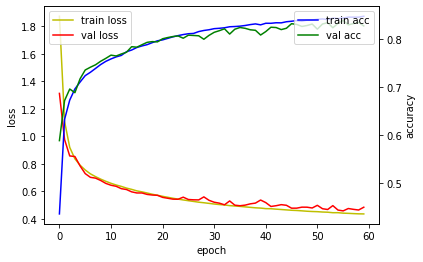

In [100]:
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

# 카드 서비스 카테고리 맞추는 게 더 중요 : 일단 이것만 보자
loss_ax.plot(hist.history['cat_out_loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_cat_out_loss'], 'r', label='val loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
loss_ax.legend(loc='upper left')

acc_ax.plot(hist.history['cat_out_sparse_categorical_accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_cat_out_sparse_categorical_accuracy'], 'g', label='val acc')
acc_ax.set_ylabel('accuracy')
acc_ax.legend(loc='upper right')

plt.show()

## Online test

In [101]:
# cosine similarity
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [102]:
card_df = pd.read_csv('./data/20210421_card_meta_features_normalized.csv') #, index=False)
card_df = card_df.set_index('상품번호')

# 모델 입력용 array
df_array = card_df.to_numpy()
ftrs = {x:df_array[idx] for idx, x in enumerate(card_df.index)}

In [103]:
# 서비스이름 참조용
svc_dict = {idx:svc for idx, svc in enumerate(card_df.columns[1:])}

In [104]:
# 카드이름 참조용
name_dict = pickle.load(open('./data/20210420_cardname_dict.pkl', 'rb'))

In [105]:
# 상품명을 보고 아래와 같이 구분할 수 잇도록
skypass = {'AFJAPT', 'ALMA1V', 'ALNA7M', 'ALPAPE', 'ALRB01', 'ALSB7E', 'ALWBPA', 'BFBBQ0'}
asiana = {'AFJAPU', 'ALNA7N', 'ALPAPF', 'ALRB02', 'ALSB7F', 'ALWBPB', 'BFAB8J'}

In [135]:
%%time
n_sel = 3 #np.random.randint(6)
if n_sel > 0:
    sel_ids = card_df.sample(n_sel).index
    sel_ftrs = [ftrs.get(i) for i in sel_ids]
    X1, X2 = np.mean(sel_ftrs, axis=0), np.max(sel_ftrs, axis=0)
else:
    sel_ids = []
    X1, X2 = np.array([0]*24), np.array([0]*24)
sel_names = [name_dict.get(i) for i in sel_ids]
pred = model.predict([pd.DataFrame(X1).T, pd.DataFrame(X2).T])
A = np.concatenate((pred[0][0], pred[1][0]))
print('SELECTED', sel_names)
print('SEL AIRS', ['아시아나' if x in asiana else '대한항공' if x in skypass else '' for x in sel_ids])
print('SVC IDS', svc_dict.get(np.argmax(X1)), svc_dict.get(np.argmax(X2)))
ret = []
for B in ftrs:
    if B not in sel_ids:
        ret.append([B, name_dict.get(B), cos_sim(A, ftrs.get(B))])
ret = pd.DataFrame(ret, columns=['id', 'name', 'score']).sort_values(by='score', ascending=False)
ret['항공구분'] = ret['id'].map(lambda x: '아시아나' if x in asiana else '대한항공' if x in skypass else '')
ret.head(10)

SELECTED ['신한카드 MY CAR', '신한카드 The CLASSIC-L', '신한카드 The CLASSIC-Y']
SEL AIRS ['', '대한항공', '']
SVC IDS 항공/라운지 아파트관리비/공과금
CPU times: user 8.47 ms, sys: 2.07 ms, total: 10.5 ms
Wall time: 8.17 ms


,id,name,score,항공구분
23,ALZCCY,None,0.742175,
34,ALWBPB,신한카드 The BEST+,0.635616,아시아나
41,ALNA7N,신한카드 The CLASSIC-L,0.586224,아시아나
33,ALWBPA,신한카드 The BEST+,0.574398,대한항공
42,ALNA7L,신한카드 The CLASSIC-L,0.573384,
32,ALSB7F,신한카드 The ACE BLUE LABEL,0.506210,아시아나
31,ALSB7E,신한카드 The ACE BLUE LABEL,0.424516,대한항공
3,BFAB8J,아시아나 신한카드 Air 1.5,0.235339,아시아나
38,ALRB02,신한카드 The BEST-T,0.205020,아시아나
21,BA69LH,신한카드 Lesson Platinum#,0.197903,
